# Описание проекта - Открыть точку общепита в Москве та еще задачка, и с целью эфективности вложений в открытие своего дела, нужно оценить текущее положение дел на рынке и сроки окупаемости .

## Название проекта - Рынок заведений общественного питания Москвы

## Цель проекта - на основе имеющихся данных подготовить анализ данных о заведениях общепита в Москве. 

## Общая информация:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from io import BytesIO
import requests


In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
display(rest_data.head(7))

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10


In [5]:
rest_data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Поиск пропусков

In [6]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Поиск дубликатов

In [7]:
display(rest_data.duplicated().sum())

0

Изменение шрифта

In [8]:
rest_data['object_name'] = rest_data['object_name'].str.lower()

#### Вывод - в имеющихся данных пропусков и дубликатов не найдено, все оставил как есть, кроме написания названий точек общепита - их написание сменил, так как все были по разному написаны и привел к общему образцу.

Поиск дубликатов только по столбцам 'object_name','chain','object_type','address'

In [9]:
rest_data.duplicated(subset=['object_name','chain','object_type','address'],keep='last').sum()


183

In [10]:
rest_data=rest_data.drop_duplicates(subset=['object_name','chain','object_type','address'],keep='last').reset_index()


In [11]:
rest_data = rest_data.drop('index', axis=1)

Заведения с min и max количеством мест и сети с 1 заведением

In [12]:
rest_data['number'].min()

0

In [13]:
rest_data['number'].max()

1700

In [14]:
rest_data_ch=rest_data.query('chain=="да"')
rest_data_ch

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15178,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36
15179,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15180,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15181,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [15]:
rest_data_ch = rest_data_ch.pivot_table(index='object_name', values='object_type', aggfunc='count')
rest_data_ch = rest_data_ch.sort_values(by='object_type', ascending=False)
rest_data_ch

,object_type
object_name,
kfc,155
шоколадница,154
макдоналдс,148
бургер кинг,136
теремок,94
...,...
кафе «торнадо»,1
кафе «тапчан»,1
кафе «тануки»,1


In [16]:
rest_data_ch1 = rest_data_ch.query('object_type==1')
rest_data_ch1

,object_type
object_name,
папа джонс пицца,1
помидор,1
пбо «kfc покрышкина»,1
шоколад,1
чин чин,1
...,...
кафе «торнадо»,1
кафе «тапчан»,1
кафе «тануки»,1


## Шаг №2. Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [17]:
rest_data123=rest_data.pivot_table(index='object_type', values='object_name', aggfunc='count')
rest_data123=rest_data123.sort_values(by='object_name', ascending=False).reset_index()
rest_data123

,object_type,object_name
0,кафе,6008
1,столовая,2575
2,ресторан,2275
3,предприятие быстрого обслуживания,1890
4,бар,853
5,буфет,570
6,кафетерий,393
7,закусочная,347
8,магазин (отдел кулинарии),272


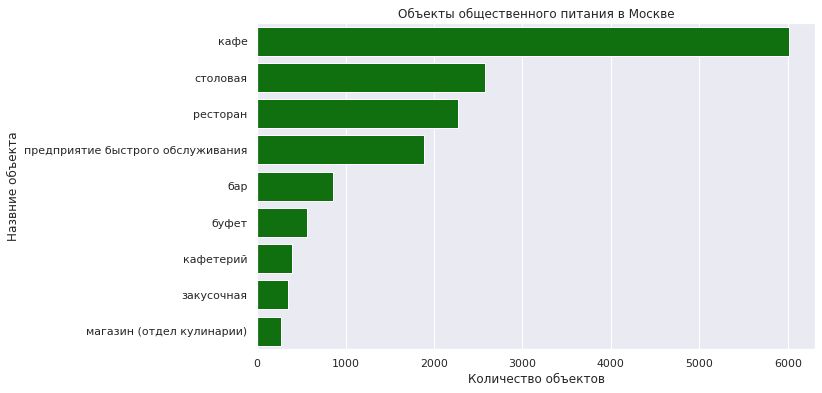

In [18]:
plt.figure(figsize=(10,6)) 
sns.set() 
temp = rest_data.groupby('object_type').count().reset_index()
ax = sns.barplot(x='number', y='object_type', data=temp.sort_values('number', ascending=False),color='green')
ax.set_title('Объекты общественного питания в Москве')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Назвние объекта')
plt.show()

#### Вывод - из полученного графика видно, что самым популярным объектом является кафе, их 6008 шт. в Москве, далее столовая - 2575 шт., ресторан - 2275 шт. и тд.

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

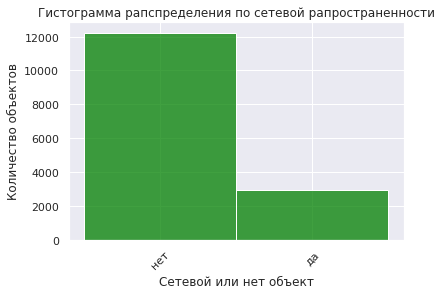

In [19]:
sns.set() 
plt.xticks(rotation=45)
plt.ylabel('Количество объектов')
plt.xlabel('Сетевой или нет объект')
sns.histplot(rest_data["chain"],color='green')
plt.title("Гистограмма рапспределения по сетевой рапространенности")
plt.show()

In [20]:
rest_data.groupby('chain')['object_type'].count()


chain
да      2949
нет    12234
Name: object_type, dtype: int64

#### Вывод - данные говорят сами за себя, сетевых предприятий почти в 4 раза меньше, сестевых - 2968 шт., не сетевых - 12398.

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [21]:
rest_data_chain_yes = rest_data.query('chain=="да"')
rest_data_chain_yes.groupby('object_type')['object_name'].count().sort_values(ascending=False)

object_type
кафе                                 1387
предприятие быстрого обслуживания     784
ресторан                              542
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              51
бар                                    37
буфет                                  11
столовая                                3
Name: object_name, dtype: int64

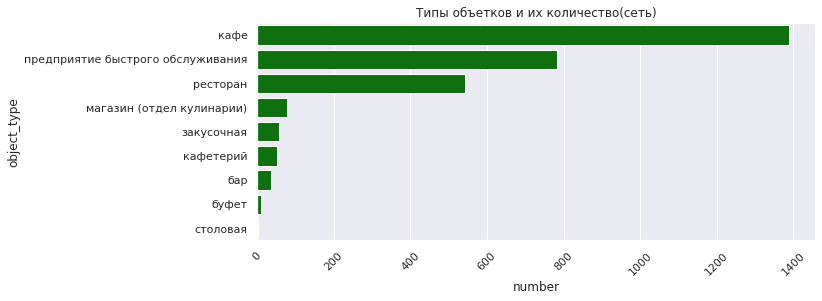

In [22]:
plt.figure(figsize=(10,4)) 
sns.set() 
temp1 = rest_data_chain_yes.groupby('object_type').count().reset_index()
plt.xticks(rotation=45)
plt.ylabel('Количество объектов')
plt.xlabel('Сетевой объект')
sns.barplot(x='number', y='object_type', data=temp1.sort_values('number', ascending=False),color='green')
plt.title("Типы объетков и их количество(сеть)") 
plt.show() 

#### Вывод - Гистограмма показывает, что самое распространненое  место среди сетевых объектов  кафе, их 1396 шт., далее предприятие быстрого обслуживания - 791 шт., ресторан - 544 шт.

In [23]:
payer = pd.pivot_table(rest_data_chain_yes, index = 'object_type', values='object_name', aggfunc = 'count')

payer['chogort'] = rest_data['object_type'].value_counts().sort_values()
payer['%_object_type'] = payer['object_name']/payer['chogort']
payer=payer.sort_values(by='%_object_type', ascending=False)
payer

,object_name,chogort,%_object_type
object_type,,,
предприятие быстрого обслуживания,784,1890,0.414815
магазин (отдел кулинарии),78,272,0.286765
ресторан,542,2275,0.238242
кафе,1387,6008,0.230859
закусочная,56,347,0.161383
кафетерий,51,393,0.129771
бар,37,853,0.043376
буфет,11,570,0.019298
столовая,3,2575,0.001165


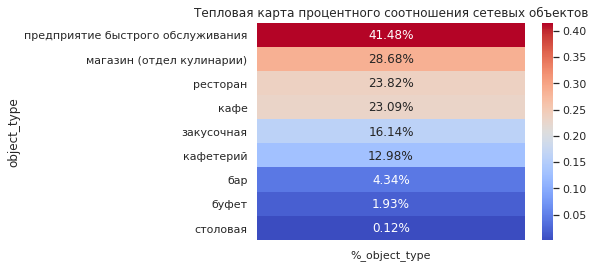

In [24]:
sns.heatmap(payer.drop(columns=['object_name','chogort']), annot=True, fmt='.2%', cmap= 'coolwarm')
plt.title('Тепловая карта процентного соотношения cетевых объектов')

plt.show()

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [25]:
rest_data_chain_yes.groupby('number')['object_type'].count()

number
0      262
1       15
2       29
3       16
4       44
      ... 
430      1
456      1
480      1
500      1
580      1
Name: object_type, Length: 194, dtype: int64

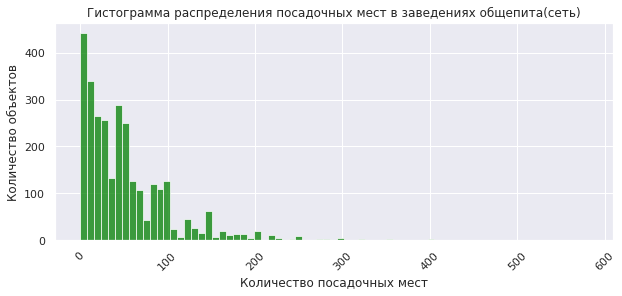

In [26]:
plt.figure(figsize=(10,4)) 
sns.set() 
plt.xticks(rotation=45)
plt.ylabel('Количество объектов')
plt.xlabel('Количество посадочных мест')
sns.histplot(rest_data_chain_yes["number"],color='green')
plt.title("Гистограмма распределения посадочных мест в заведениях общепита(сеть)") 
plt.show() 

In [27]:
rest_data_chain_yes.groupby('object_type')['number'].count().sort_values(ascending=False)

object_type
кафе                                 1387
предприятие быстрого обслуживания     784
ресторан                              542
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              51
бар                                    37
буфет                                  11
столовая                                3
Name: number, dtype: int64

Посмотрим на колчиство посадочных мест в зависимости от типа объекта 

In [28]:
# группируем данные по наименованиям сети
rest_chain_group = rest_data_chain_yes.groupby('object_name')['number'].agg(['count','median']).reset_index()
rest_chain_group

,object_name,count,median
0,beverly hills diner,1,88.0
1,bierloga,1,75.0
2,black & white,1,40.0
3,bocconcino,3,68.0
4,boobo,1,46.0
...,...,...,...
572,ямми микс,1,2.0
573,ян примус,1,300.0
574,японский ресторан «ваби-саби»,1,155.0
575,япоша,2,105.0


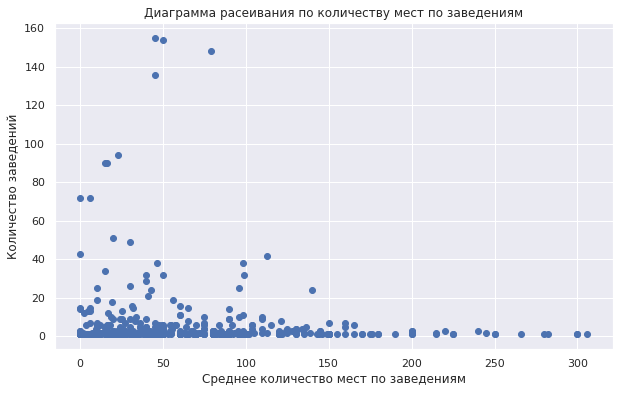

In [29]:
fig, test = plt.subplots()
test.scatter(rest_chain_group['median'],rest_chain_group['count'])

test.set_title('Диаграмма расеивания по количеству мест по заведениям') 
test.set_xlabel('Среднее количество мест по заведениям')
test.set_ylabel('Количество заведений') 
fig.set_figheight(6)  
fig.set_figwidth(10)  

plt.show()

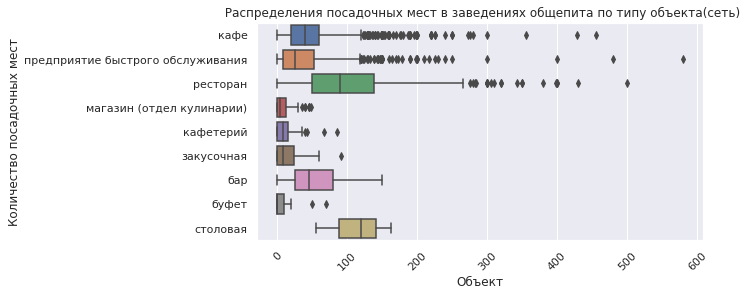

In [30]:
plt.figure(figsize=(8,4)) 
sns.set() 
plt.xticks(rotation=45)
sns.boxplot(x='number', y='object_type', data=rest_data_chain_yes)
plt.title(" Распределения посадочных мест в заведениях общепита по типу объекта(сеть)") 
plt.ylabel('Количество посадочных мест')
plt.xlabel('Объект')
plt.show()

#### Вывод - для сетевых заведений, если смотреть по посадочным местам то преобладает кафе в количестве 1396 шт. но разброс по количеству посадочных мест не большой от 20 до 60 посадочных мест, предприятие общественного питания имеет  791 точек но разброс по местам примерно тот же что и у кафе немного меньше до 50 мест, ресторанов хоть и меньше - 544 шт. но разнос по посадкам больше - от 60 до 130 мест и тд.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики

In [31]:
rest_data_median = rest_data.pivot_table(index = 'object_type', values = 'number', aggfunc='median')
rest_data_median= rest_data_median.sort_values(by='number', ascending=False).reset_index()
rest_data_median

,object_type,number
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,31
5,кафетерий,6
6,предприятие быстрого обслуживания,6
7,закусочная,0
8,магазин (отдел кулинарии),0


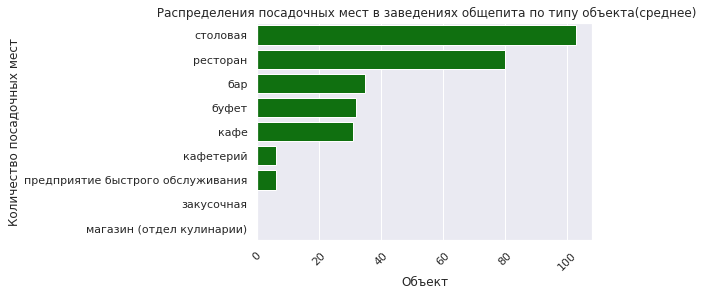

In [32]:
sns.set() 
plt.xticks(rotation=45)
sns.barplot(x='number', y='object_type', data=rest_data_median, color='green')
plt.title(" Распределения посадочных мест в заведениях общепита по типу объекта(среднее)") 
plt.ylabel('Количество посадочных мест')
plt.xlabel('Объект')
plt.show()

#### Вывод - по средним значениям на 1 м месте находиться столовая с 103 мест, далее ресторан - 80 мест, бар - 35 мест и тд.

### Выделите в отдельный столбец информацию об улице из столбца address 

In [33]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [36]:
rest_data['street'] = rest_data['address'].apply(lambda x: x.split(',')[1])

In [37]:
rest_data = rest_data[~rest_data['street'].str.contains('город|поселение|посёлок|поселок|владение|дом|село|Проезд|тупик|линия|километр')]

In [38]:
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15177,222077,кофейня «шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15178,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15179,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15180,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал


In [39]:
rest_address = rest_data.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
rest_address.tail(50)

,street,id
1740,Фролов переулок,1
1741,Хилков переулок,1
1742,Фруктовая улица,1
1743,Кооперативная улица,1
1744,Конаковский проезд,1
1745,Хавская улица,1
1746,Композиторская улица,1
1747,Хвалынский бульвар,1
1748,Козицкий переулок,1
1749,Чукотский проезд,1


### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [40]:
top = rest_data.pivot_table(index='street', values = 'object_name', aggfunc='count')

top10 = top.sort_values('object_name', ascending=False).head(10)

top10

,object_name
street,
проспект Мира,196
Профсоюзная улица,180
Ленинградский проспект,170
Пресненская набережная,165
Варшавское шоссе,159
Ленинский проспект,147
проспект Вернадского,126
Кутузовский проспект,114
Каширское шоссе,110


In [41]:
temp = rest_data.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
temp

,street,id,object_name,chain,object_type,address,number
0,проспект Мира,196,196,196,196,196,196
1,Профсоюзная улица,180,180,180,180,180,180
2,Ленинградский проспект,170,170,170,170,170,170
3,Пресненская набережная,165,165,165,165,165,165
4,Варшавское шоссе,159,159,159,159,159,159
5,Ленинский проспект,147,147,147,147,147,147
6,проспект Вернадского,126,126,126,126,126,126
7,Кутузовский проспект,114,114,114,114,114,114
8,Каширское шоссе,110,110,110,110,110,110
9,Кировоградская улица,107,107,107,107,107,107


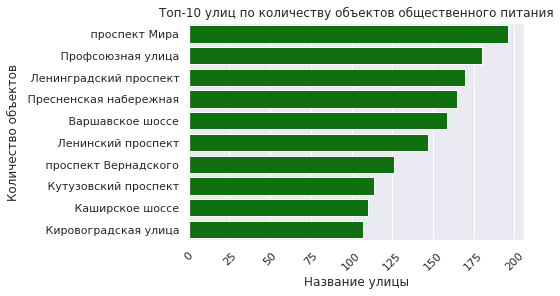

In [42]:
ax = sns.barplot(x='object_type', y='street', data=temp, color='green')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Название улицы')
ax.set_ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.show()

In [43]:
spreadsheet_id = '1c0GVZSnLlmILMxK7fFgf3FboEl5KoAx38jOw8L_gFuo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head(5)

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN


In [44]:
df = df[['District','Address']]
df = df.rename(columns={'District':'district', 'Address':'address'})
df.head(5)

,district,address
0,Район,Адрес
1,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
2,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
3,Таганский район,"Российская Федерация, город Москва, внутригоро..."
4,район Лианозово,"город Москва, Угличская улица, дом 17"


In [45]:
symbols = [',', '«', '»', '(', ')', '"', '  ']

for s in symbols:
    df['address'] = df['address'].str.replace(s, ' ')
df['address'] = df['address'].str.replace('ё','е')

/tmp/ipykernel_524/1812223149.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['address'] = df['address'].str.replace(s, ' ')


In [46]:
address = df['address'].to_list()
streets = []

for street in address:  
    start = street.find('город москва')
    end = street.find('дом ')
    streets.append(street[start+13:end-1])
    
        
df['street'] = streets    
df.head(5) 

,district,address,street
0,Район,Адрес,
1,Ярославский район,город Москва улица Егора Абакумова дом 9,улица Егора Абакумова
2,Таганский район,город Москва улица Талалихина дом 2/1 корпус 1,улица Талалихина
3,Таганский район,Российская Федерация город Москва внутригородс...,едерация город Москва внутригородская территор...
4,район Лианозово,город Москва Угличская улица дом 17,Угличская улица


In [47]:
df = df[~df['street'].str.contains('шоссе|поселение|посёлок|поселок|владение|дом|село|Проезд|тупик|линия|километр')]

In [48]:
rest_data_top = temp.merge(df, on='street',how='left')
rest_data_top = rest_data_top[['street', 'object_name','district']]
rest_data_top

,street,object_name,district
0,проспект Мира,196,Мещанский район
1,проспект Мира,196,Мещанский район
2,проспект Мира,196,Мещанский район
3,проспект Мира,196,Мещанский район
4,проспект Мира,196,Мещанский район
...,...,...,...
1105,Кировоградская улица,107,район Чертаново Северное
1106,Кировоградская улица,107,район Чертаново Южное
1107,Кировоградская улица,107,район Чертаново Центральное
1108,Кировоградская улица,107,район Чертаново Центральное


In [49]:
rest_data_top.groupby(by=['street','district']).count().sort_values('street', ascending=False)

object_name
street                  district                                
 проспект Мира          район Свиблово                        53
                        район Ростокино                        6
                        Останкинский район                    40
                        Мещанский район                       60
                        Алексеевский район                    37
 проспект Вернадского   поселение Вороновское                  1
                        Ломоносовский район                   11
                        район Проспект Вернадского            23
                        район Раменки                         24
                        район Тропарёво-Никулино              76
 Профсоюзная улица      район Ясенево                         22
                        район Черёмушки                       23
                        район Тёплый Стан                     27
                        район Коньково                        39
                        Обручевский район                     24
                        Академический район                    1
 Пресненская набережная Пресненский район                    103
 Ленинский проспект     район Якиманка                        12
                        район Тропарёво-Никулино              18
                        район Проспект Вернадского            22
                        Обручевский район                     35
                        Ломоносовский район                   13
                        Донской район                          8
                        Гагаринский район                     30
                        район Тёплый Стан                     13
 Ленинградский проспект район Сокол                           29
                        район Беговой                         72
                        район Аэропорт                        82
                        Хорошёвский район                     18
 Кутузовский проспект   район Фили-Давыдково                  25
                        район Дорогомилово                    55
                        поселение Краснопахорское             11
 Кировоградская улица   район Чертаново Южное                  8
                        район Чертаново Центральное           72
                        район Чертаново Северное              15

#### Вывод -  10- ку улиц по количеству объектов питания возглавляет проспект Мира с 204 объектами, по внешней информации проспект находится в СВАО район Алексеевский, далее Профсоюзная улица  - 182 объекта ЮЗАО район на территории районов Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево, Ленингадский проспект - 170 объектов Район Беговой, Аэропорт, Сокол, Хорошёвский и тд.
- по районам 5ка самых популярных - Пресненский район,район Тропарёво-Никулино ,район Аэропорт,район Чертаново Центральное,район Беговой

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [50]:
top10 = top.query('object_name==1')
top10


,object_name
street,
1-й Балтийский переулок,1
1-й Басманный переулок,1
1-й Ботанический проезд,1
1-й Вешняковский проезд,1
1-й Голутвинский переулок,1
...,...
улица Шеногина,1
улица Шумилова,1
улица Шумкина,1


In [51]:
top1 = top10.merge(df, on='street', how='left')
top2 = top1[['street','district','object_name']]
top2

,street,district,object_name
0,1-й Балтийский переулок,район Аэропорт,1
1,1-й Басманный переулок,Красносельский район,1
2,1-й Ботанический проезд,район Свиблово,1
3,1-й Вешняковский проезд,NaN,1
4,1-й Голутвинский переулок,район Якиманка,1
...,...,...,...
675,улица Щорса,район Солнцево,1
676,улица Щорса,район Солнцево,1
677,улица Щорса,район Солнцево,1
678,улица Щорса,район Солнцево,1


In [52]:
top23 = top2.pivot_table(index=['district'], values='street', aggfunc='count')
top23.sort_values('street', ascending=False)

,street
district,
район Солнцево,36
Тверской район,21
Таганский район,21
Басманный район,18
район Хамовники,17
...,...
район Очаково-Матвеевское,1
Обручевский район,1
район Марьино,1


#### Вывод - список улицы на которых расположен один объект общественного питания состовляет 680 объекта, улицы расположены по всей Москве с севера Москвы и заканчивая територией недавноприсоеденной к Москве, среди заведений котрые находятся по одному на улице в районе Солнцево - 36 заведений, Тверской район - 21 заведение, Таганский район - 21,Басманный район - 18, район Хамовники - 17, кроме Солнцево все остальные сосредоточены в центре Москвы.

## Общий вывод - по имеющимся данным видно что самым популярным является небольшой объект типа кафе или предприятия быстрого питания, хотя с общепит и опережает ресторан но последний опережает по количеству посадочным мест и эти три варината для откртия на мой взгляд является более перспективными и я бы больше выделил на 2е место ресторан нежели общепит (качество всетаки лучше)/ по месту расположения труднее, здесть было б интресно посмотреть динамикку появления тех или иных точек  в районах, но если смотреть по популярнйости то хоть проспект Мира и возглавляет рейтинг по количеству объектов то наверно лучше выбрать улицу на 3 или 4 месте там всетаки не такая большая конкуренция  а именно Ленинградский проспект, Пресненская набережная( последняя видно страдает изза высокой аренды и не так много точек),Варшавское шоссе,по районам 5ка самых популярных - Пресненский район,район Тропарёво-Никулино ,район Аэропорт,район Чертаново Центральное,район Беговой

### Шаг №3. Подготовка презентации

Презентация: https://disk.yandex.ru/i/6OZ7Pf25rzpJGQ 